In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def f(x):
    return np.sin(x) + 0.5 * x

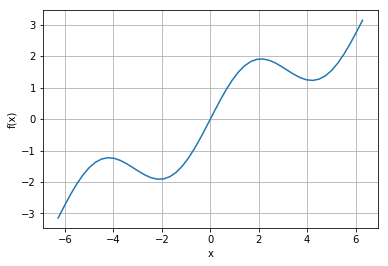

In [14]:
x = np.linspace(-2*np.pi, +2*np.pi, 50)
plt.plot(x, f(x))
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")

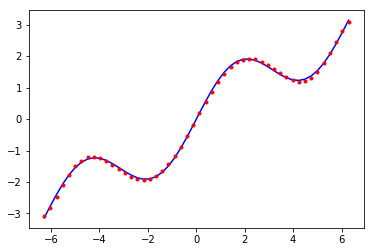

In [15]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b')
plt.plot(x, ry, 'r.',linewidth=10)

In [16]:
np.allclose(f(x), ry)

False

In [17]:
np.sum((f(x)-ry)**2)/len(ry)

0.0017769134759517595

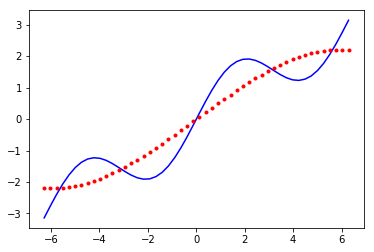

In [18]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3,:] = x ** 3
matrix[2,:] = x **2
matrix[1,:] = x
matrix[0,:] = 1

reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b')
plt.plot(x, ry, 'r.',linewidth=10)

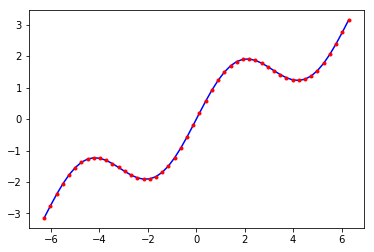

In [19]:
matrix[3,:] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b')
plt.plot(x, ry, 'r.',linewidth=10)

In [20]:
np.allclose(f(x), ry)

True

In [21]:
np.sum((f(x)-ry)**2)/len(ry)

3.3455714249939549e-31

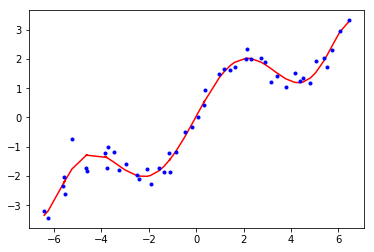

In [22]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

plt.plot(xn, ry, 'r')
plt.plot(xn, yn, 'b.')

In [25]:
def fm((x, y)):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [34]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()

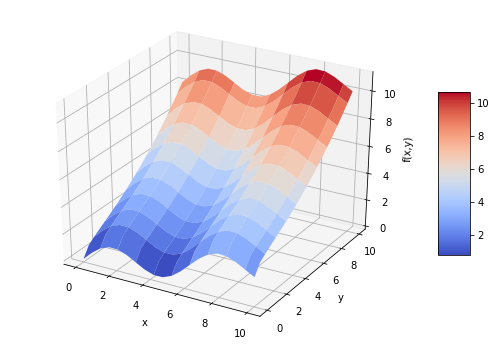

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)


In [50]:
matrix = np.zeros((len(x), 6 + 1))

matrix[:,6] = np.sqrt(y)
matrix[:,5] = np.sin(x)
matrix[:,4] = y**2
matrix[:,3] = x**2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] = 1

import statsmodels.api as sm
model = sm.OLS(fm((x, y)), matrix).fit()
model.rsquared
a = model.params

In [52]:
def reg_func(a, (x, y)):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)


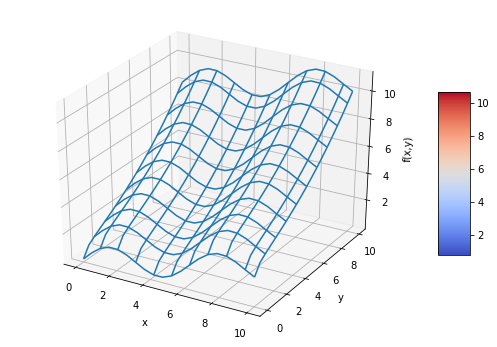

In [59]:
RZ = reg_func(a, (X, Y))

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
